**DATA COLLECTION**  *KAGGLE*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!kaggle -h

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 99% 52.0M/52.6M [00:04<00:00, 18.5MB/s]
100% 52.6M/52.6M [00:04<00:00, 13.0MB/s]


In [5]:
!unzip *.zip

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: test_labels.csv.zip     
  inflating: train.csv.zip           


In [6]:
!unzip train.csv.zip -d train
!unzip test.csv.zip -d test
!unzip test_labels.csv.zip -d testLabel

Archive:  train.csv.zip
  inflating: train/train.csv         
Archive:  test.csv.zip
  inflating: test/test.csv           
Archive:  test_labels.csv.zip
  inflating: testLabel/test_labels.csv  


In [7]:
import pandas as pd
dftrain=pd.read_csv('/content/train/train.csv')
dftrain

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
0           0             0        0       0       0              0  
1           0             0        0       0       0              0  
2           0             0        0       0       0              0  
3           0             0        0       0       0              0  
4           0             0        0       0       0              0  
...       ...           ...      ...     ...     ...            ...  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0  

[159571 rows x 8 columns]

The dataset is in csv format i am trying to use tensorflow and build my own neural network using **LSTM** layer.

**Now data exploring**

In [8]:
#perform basic stats
dftrain.describe()

toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [9]:
dftrain.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [10]:
# checking the value counts for each targets individually
for i in dftrain.columns.values[2:]:#skipping id and comment text columns
    print(dftrain[i].value_counts())
    print("-"*50)

0    144277
1     15294
Name: toxic, dtype: int64
--------------------------------------------------
0    157976
1      1595
Name: severe_toxic, dtype: int64
--------------------------------------------------
0    151122
1      8449
Name: obscene, dtype: int64
--------------------------------------------------
0    159093
1       478
Name: threat, dtype: int64
--------------------------------------------------
0    151694
1      7877
Name: insult, dtype: int64
--------------------------------------------------
0    158166
1      1405
Name: identity_hate, dtype: int64
--------------------------------------------------


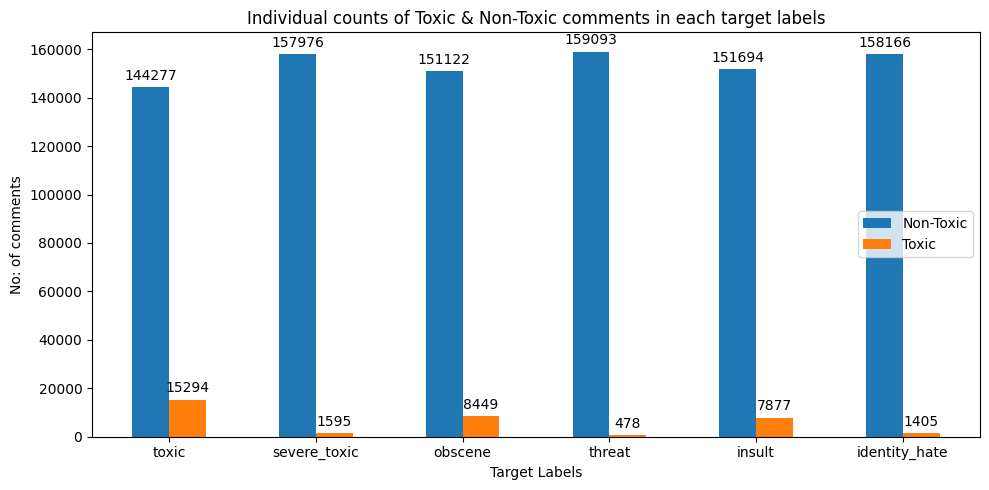

In [11]:
import matplotlib.pyplot as plt
import numpy as np

labels = dftrain.columns.values[2:]
class_0=[]
class_1=[]

for i in dftrain.columns.values[2:]:
    vc=dftrain[i].value_counts()
    class_0.append(vc[0])
    class_1.append(vc[1])

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, class_0, width, label='Non-Toxic')
rects2 = ax.bar(x + width/2, class_1, width, label='Toxic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No: of comments')
ax.set_xlabel("Target Labels")
ax.set_title('Individual counts of Toxic & Non-Toxic comments in each target labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=7)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.bar
fig.tight_layout()

plt.show()

In [12]:
!pip install venn

  Preparing metadata (setup.py) ... done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19699 sha256=5197ec5233950681fe62c7f2694677a7f4d91ed8bfbb502210cbf4a4256c425f
  Stored in directory: /root/.cache/pip/wheels/9c/ce/43/705b4a04cd822891d1d7a4c43fc444b4798978e72c79528c5f
Successfully built venn


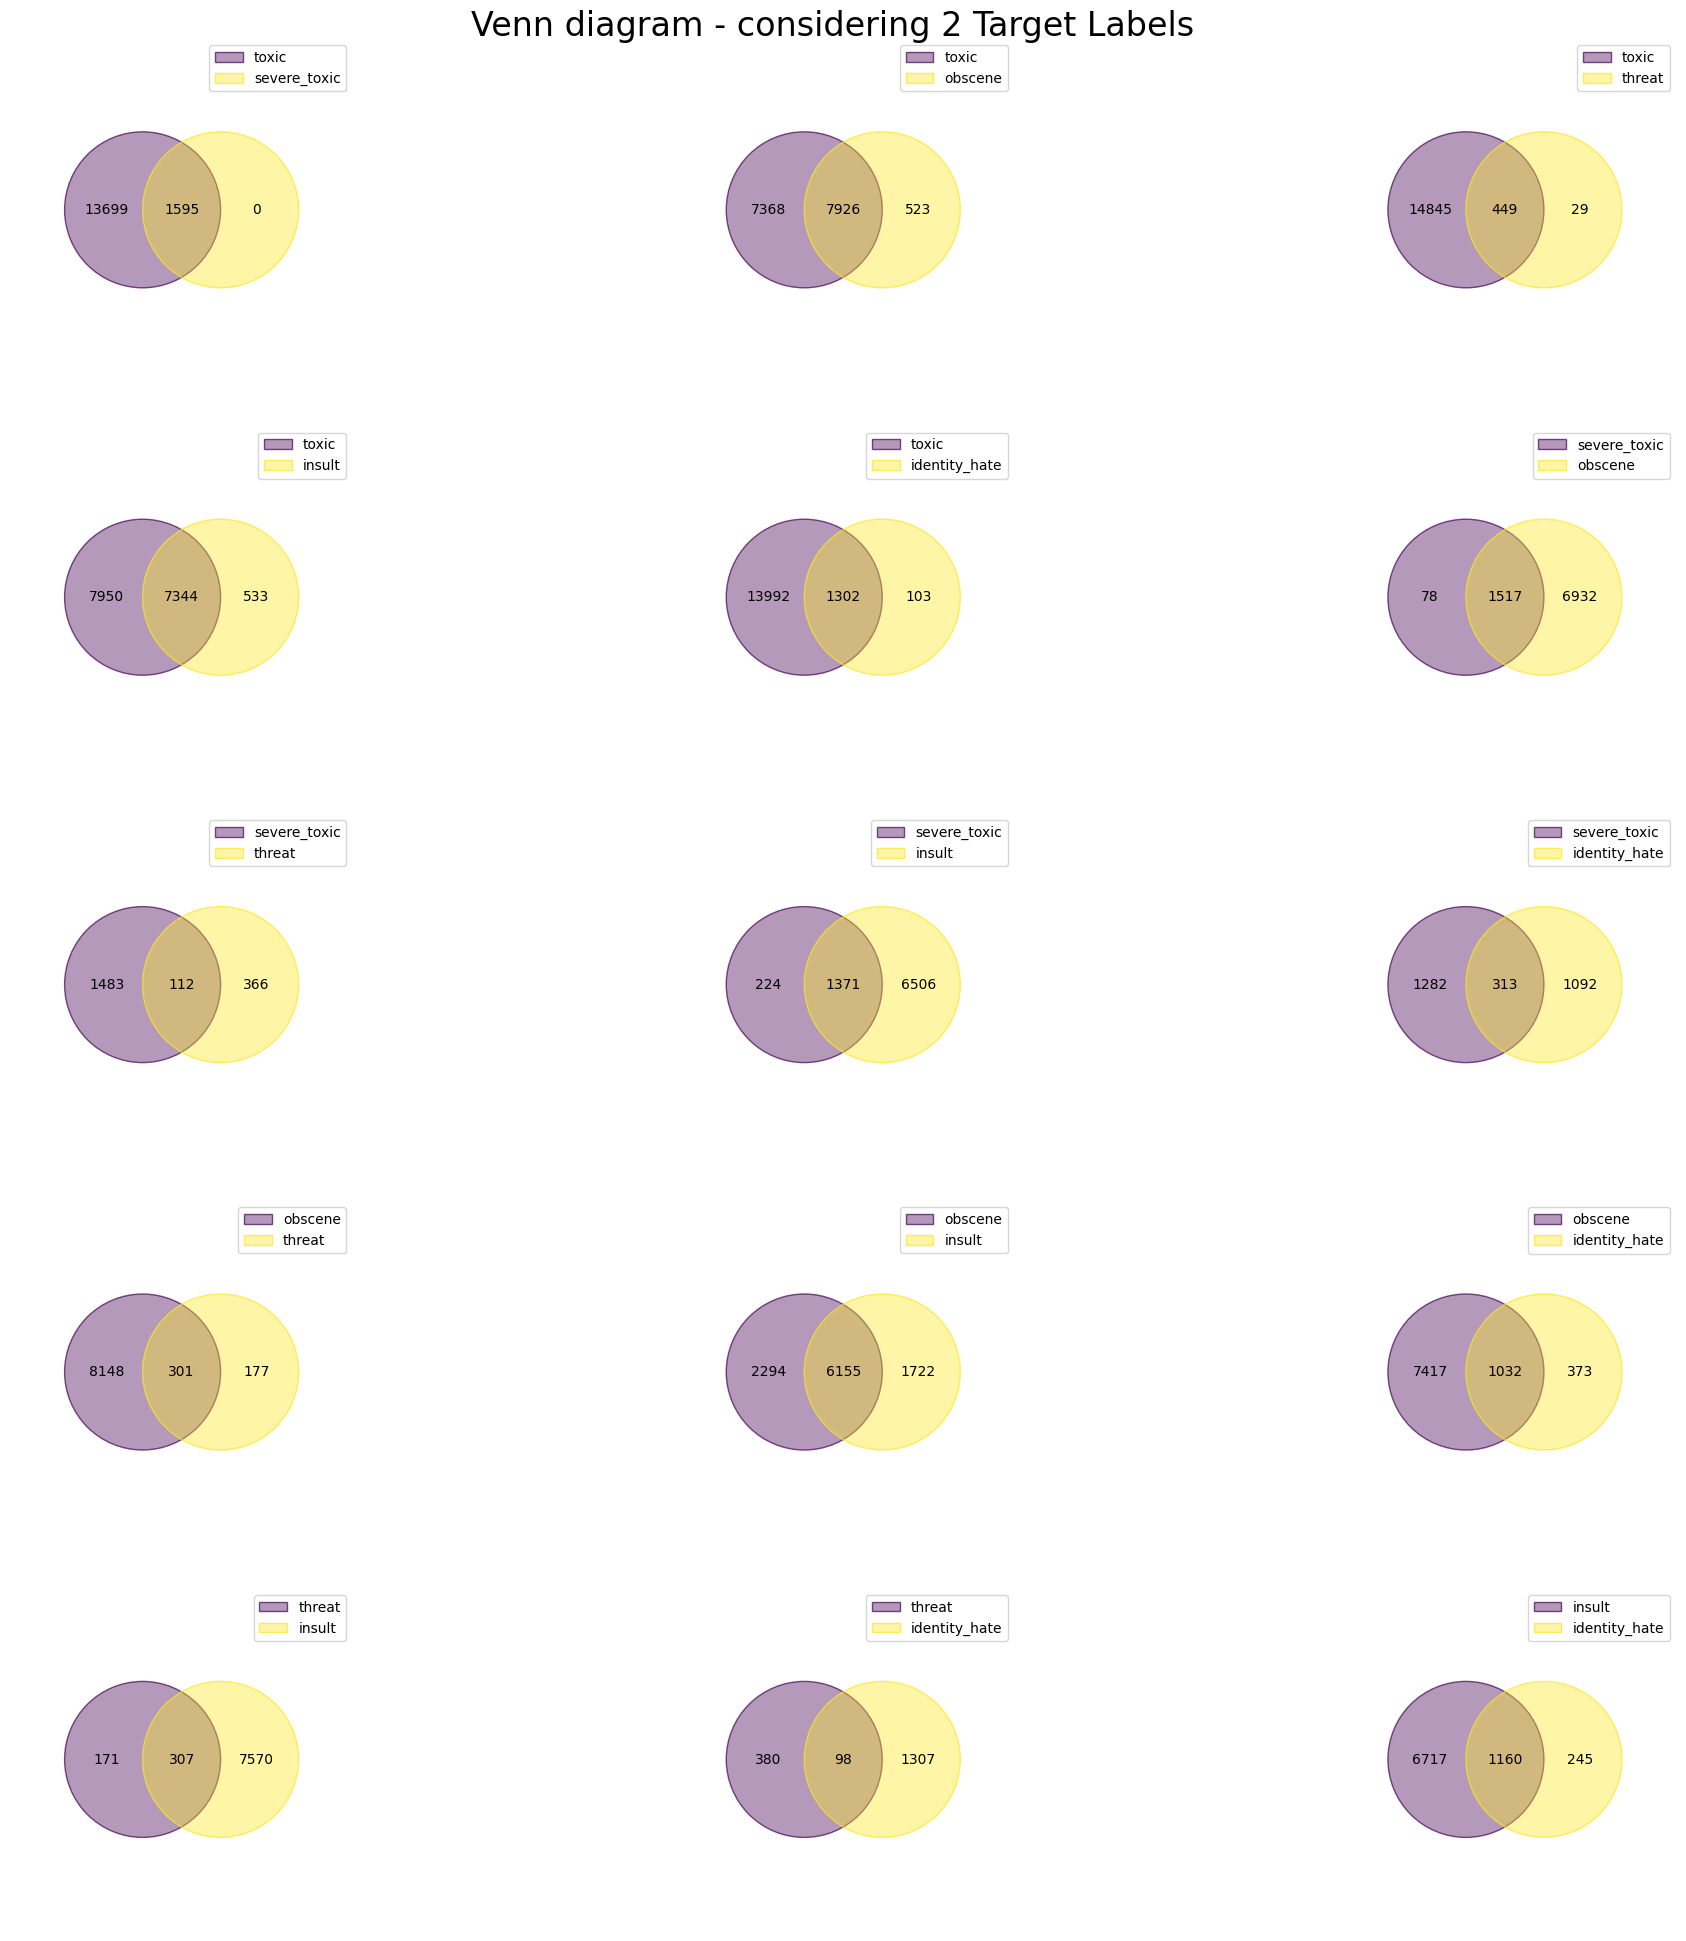

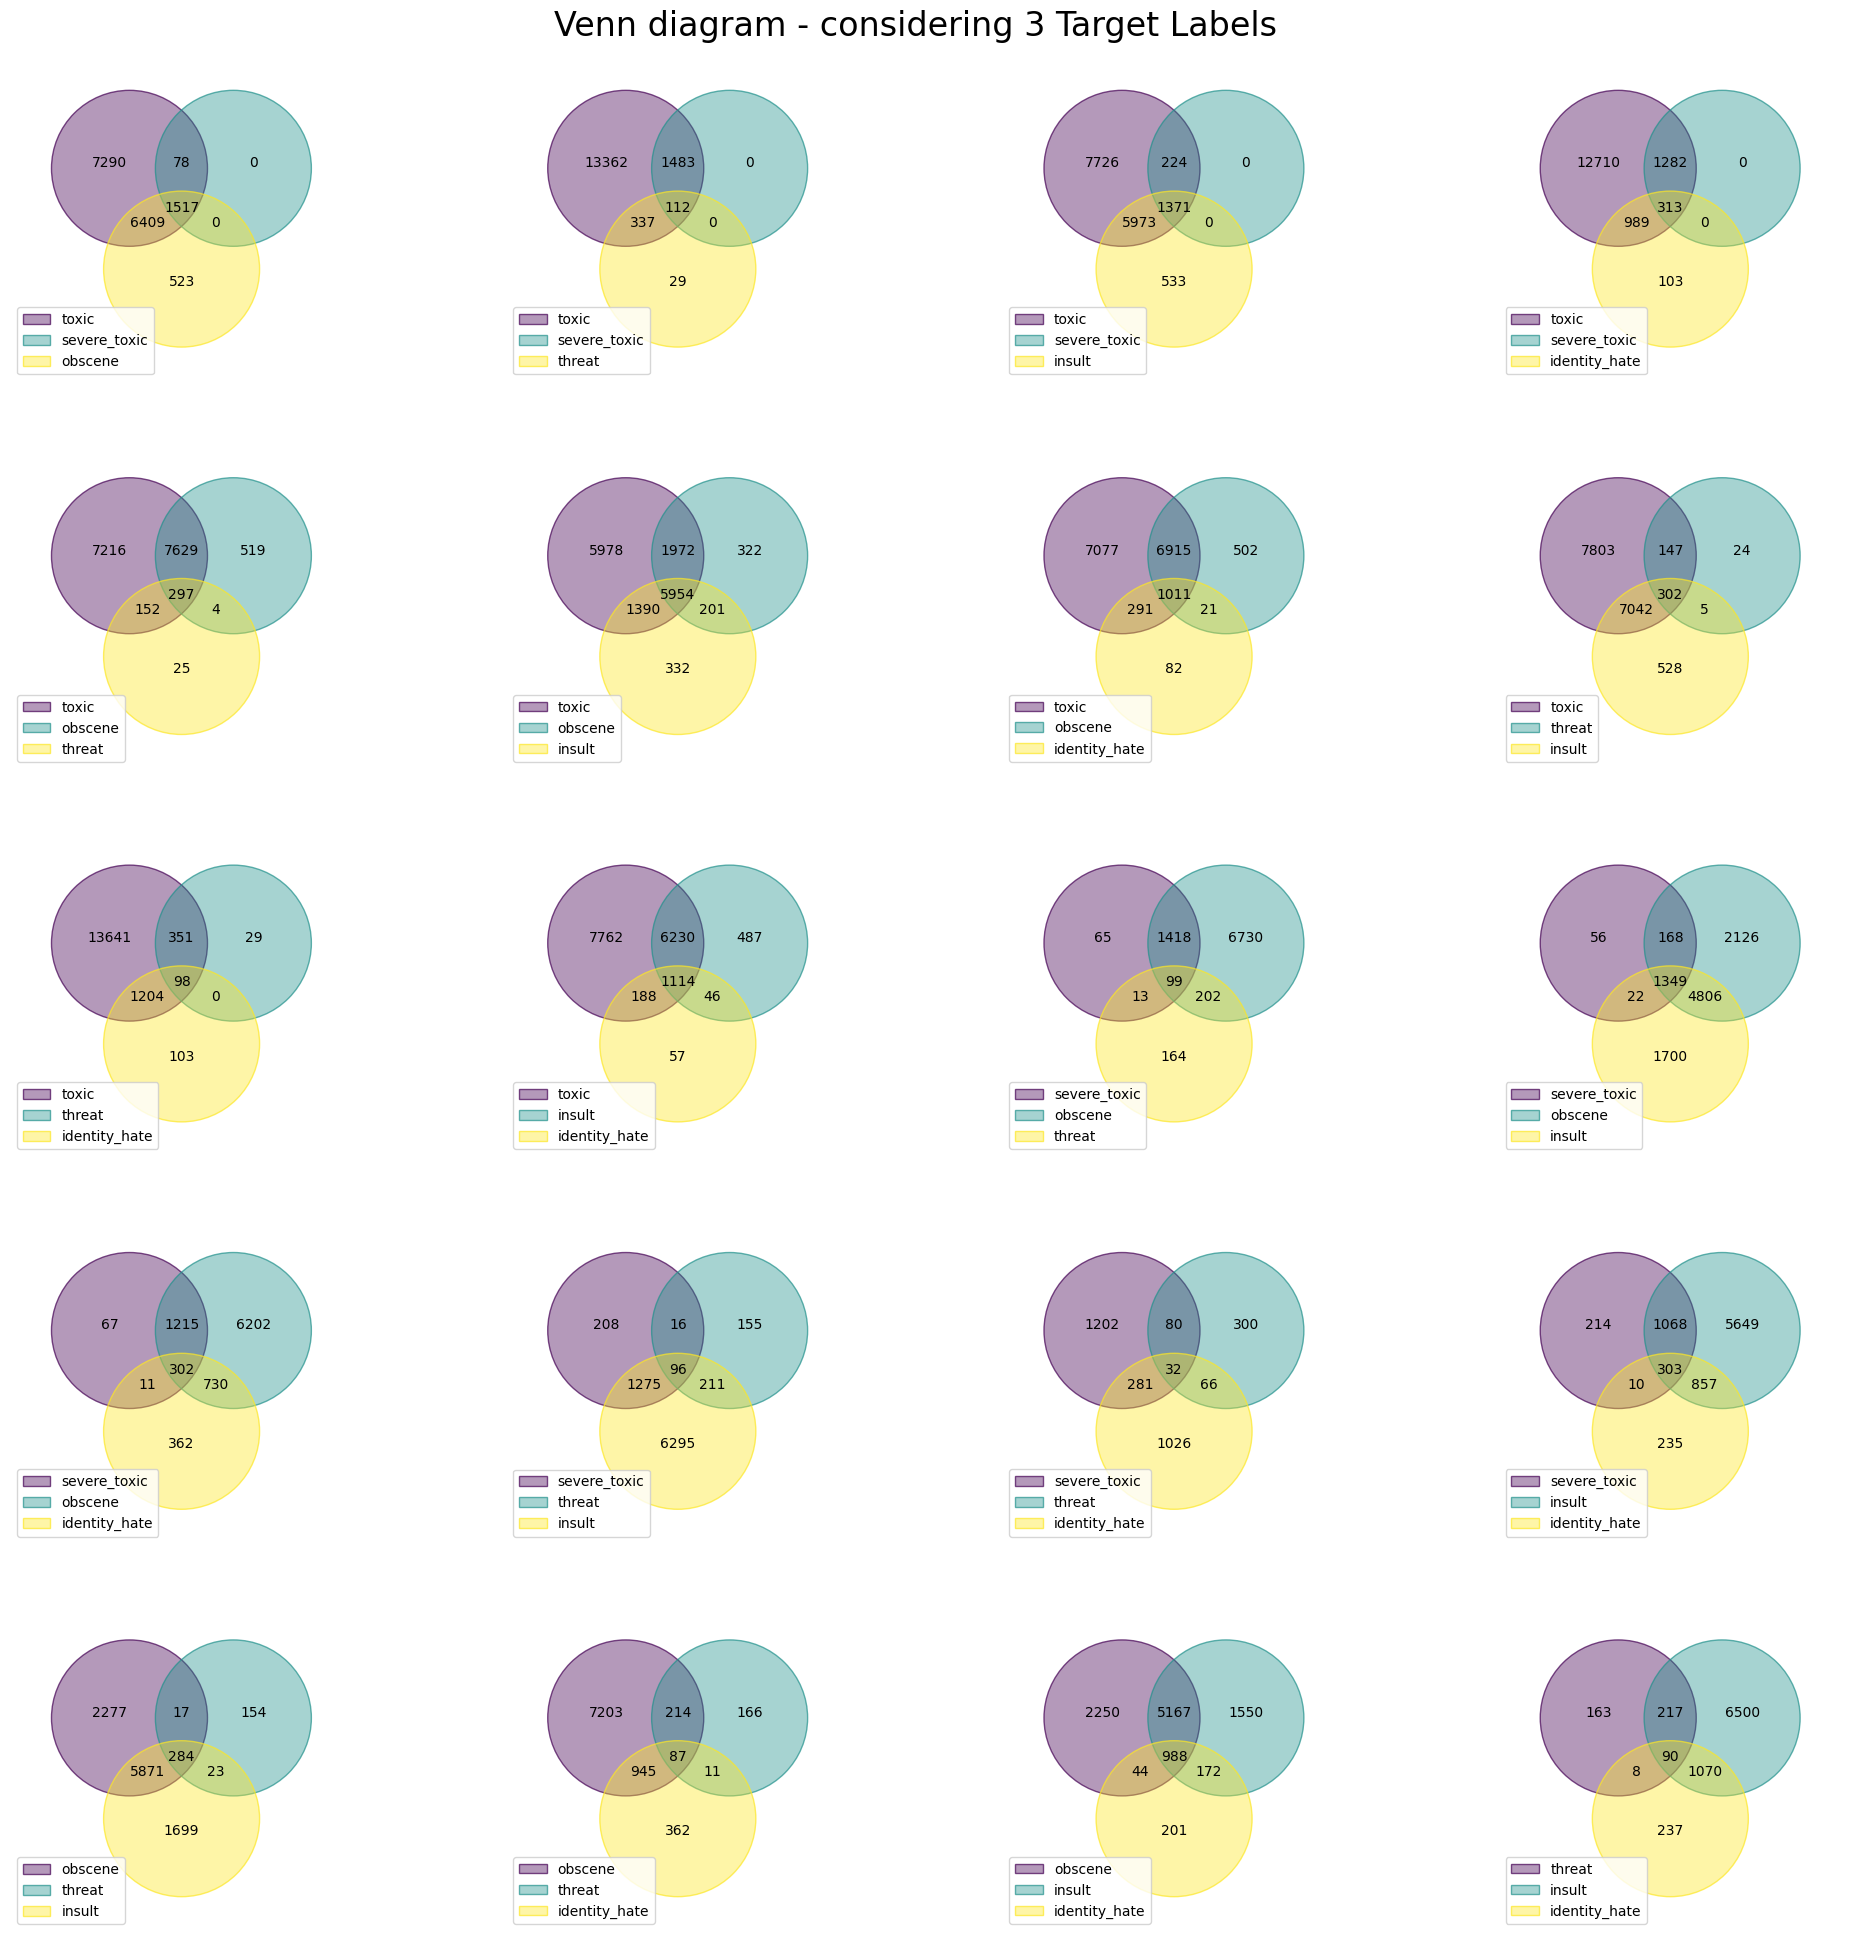

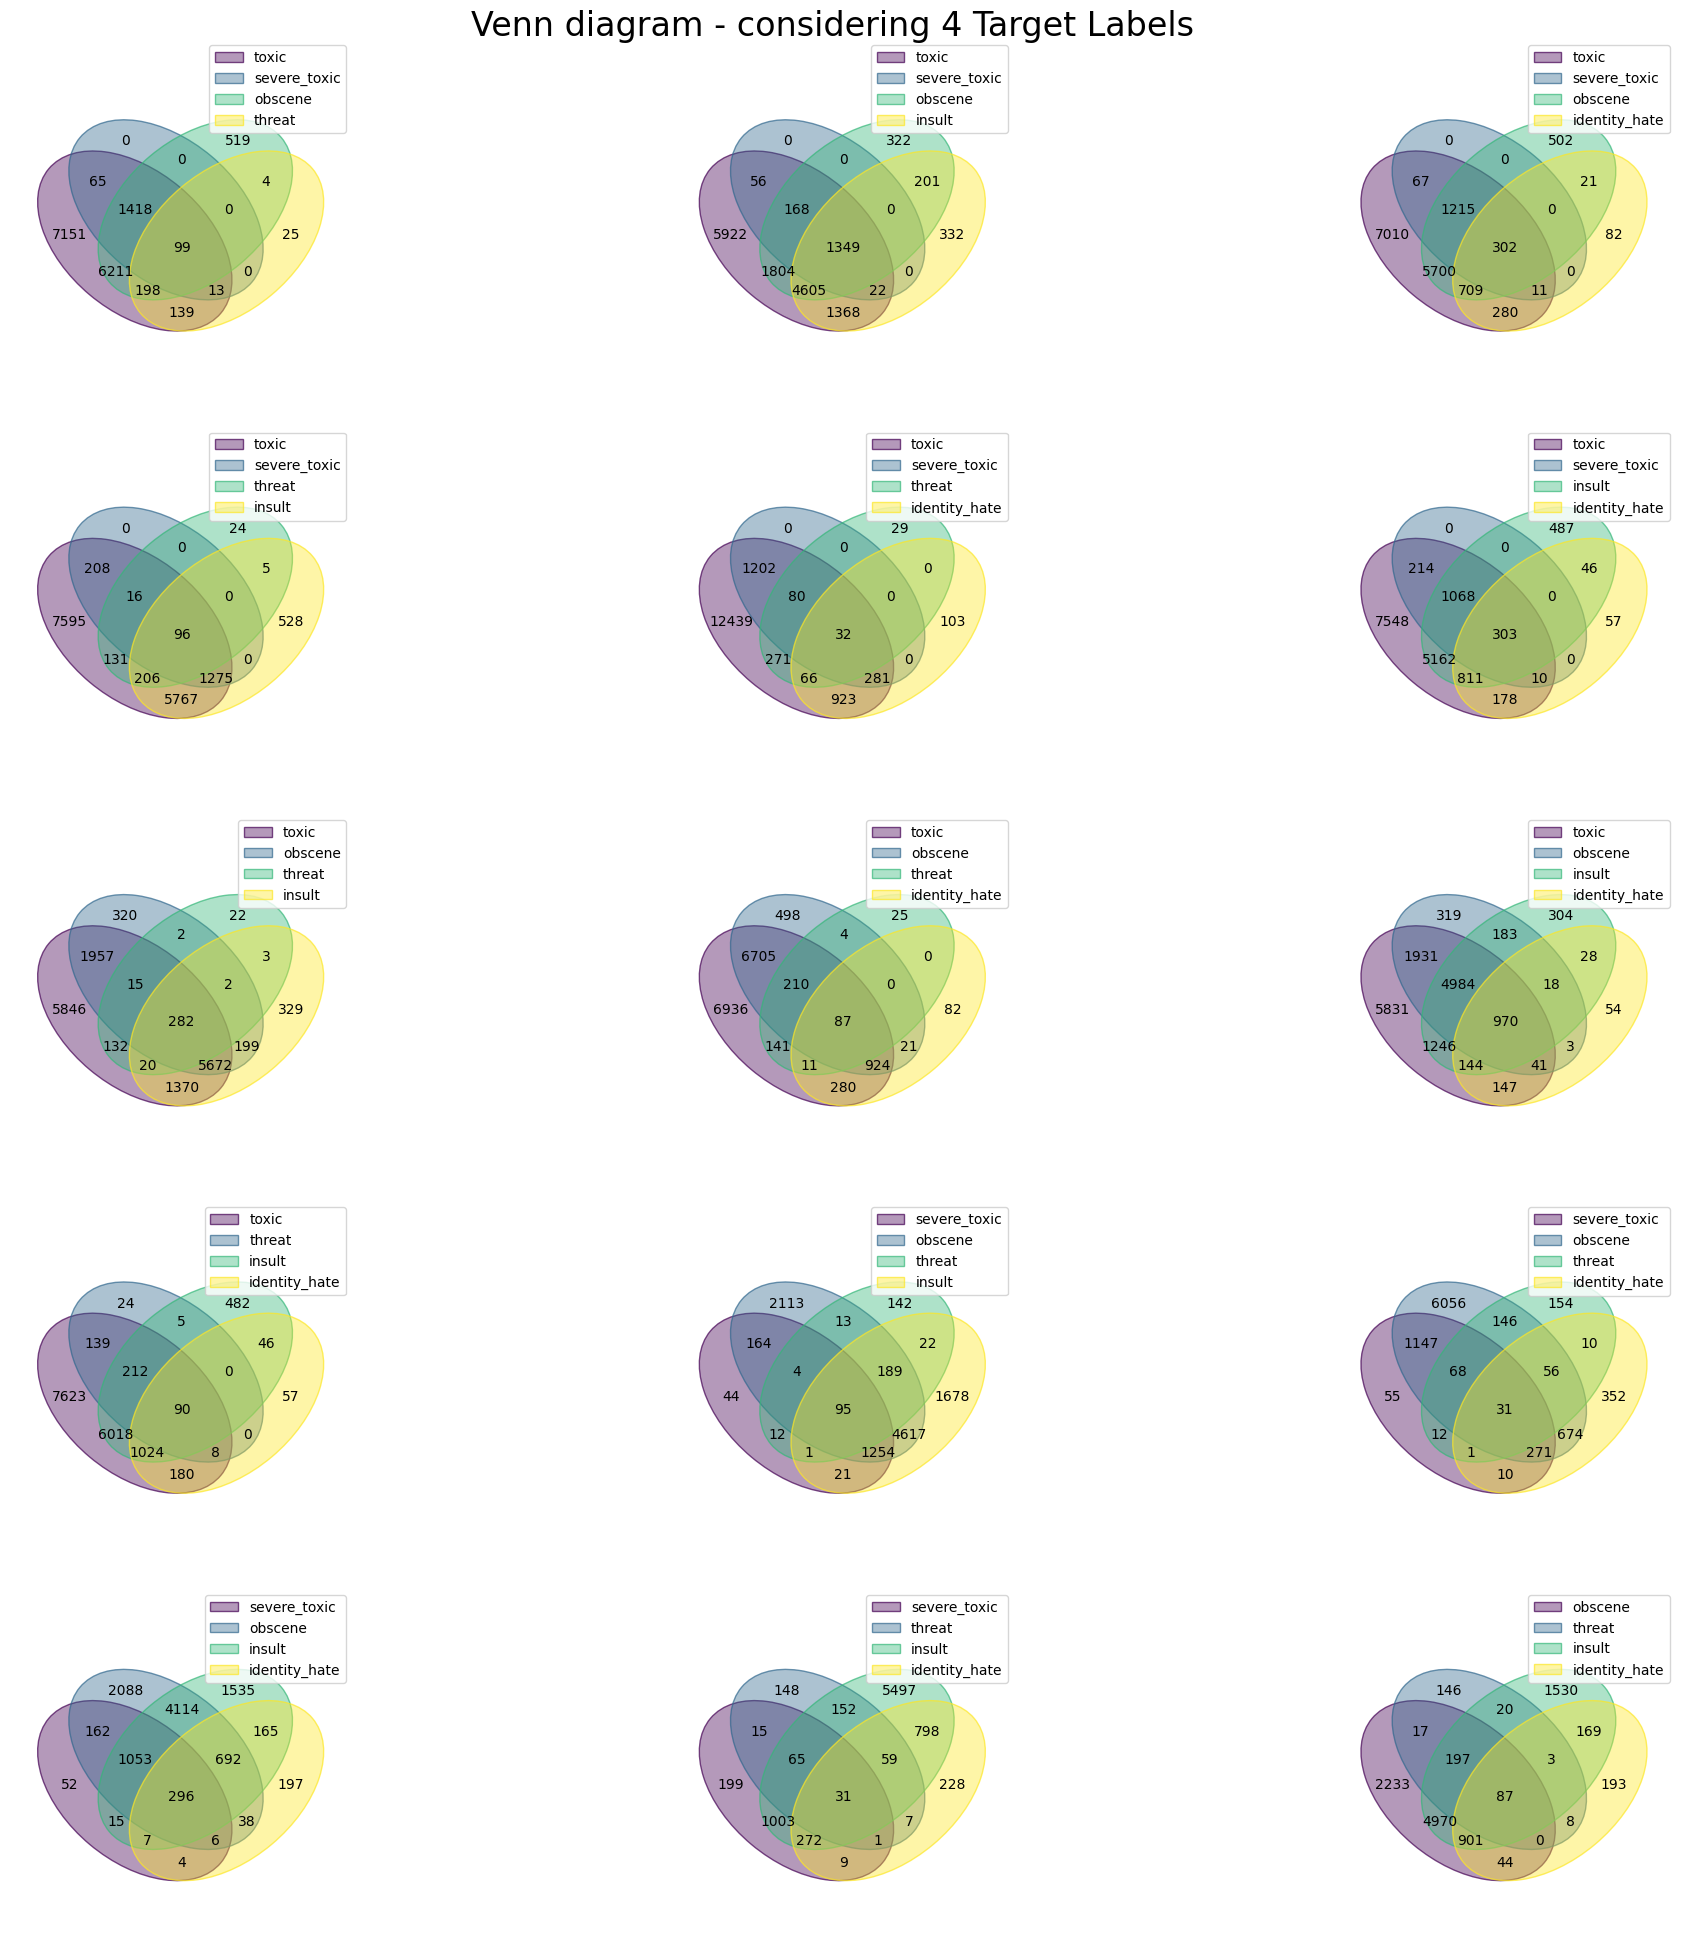

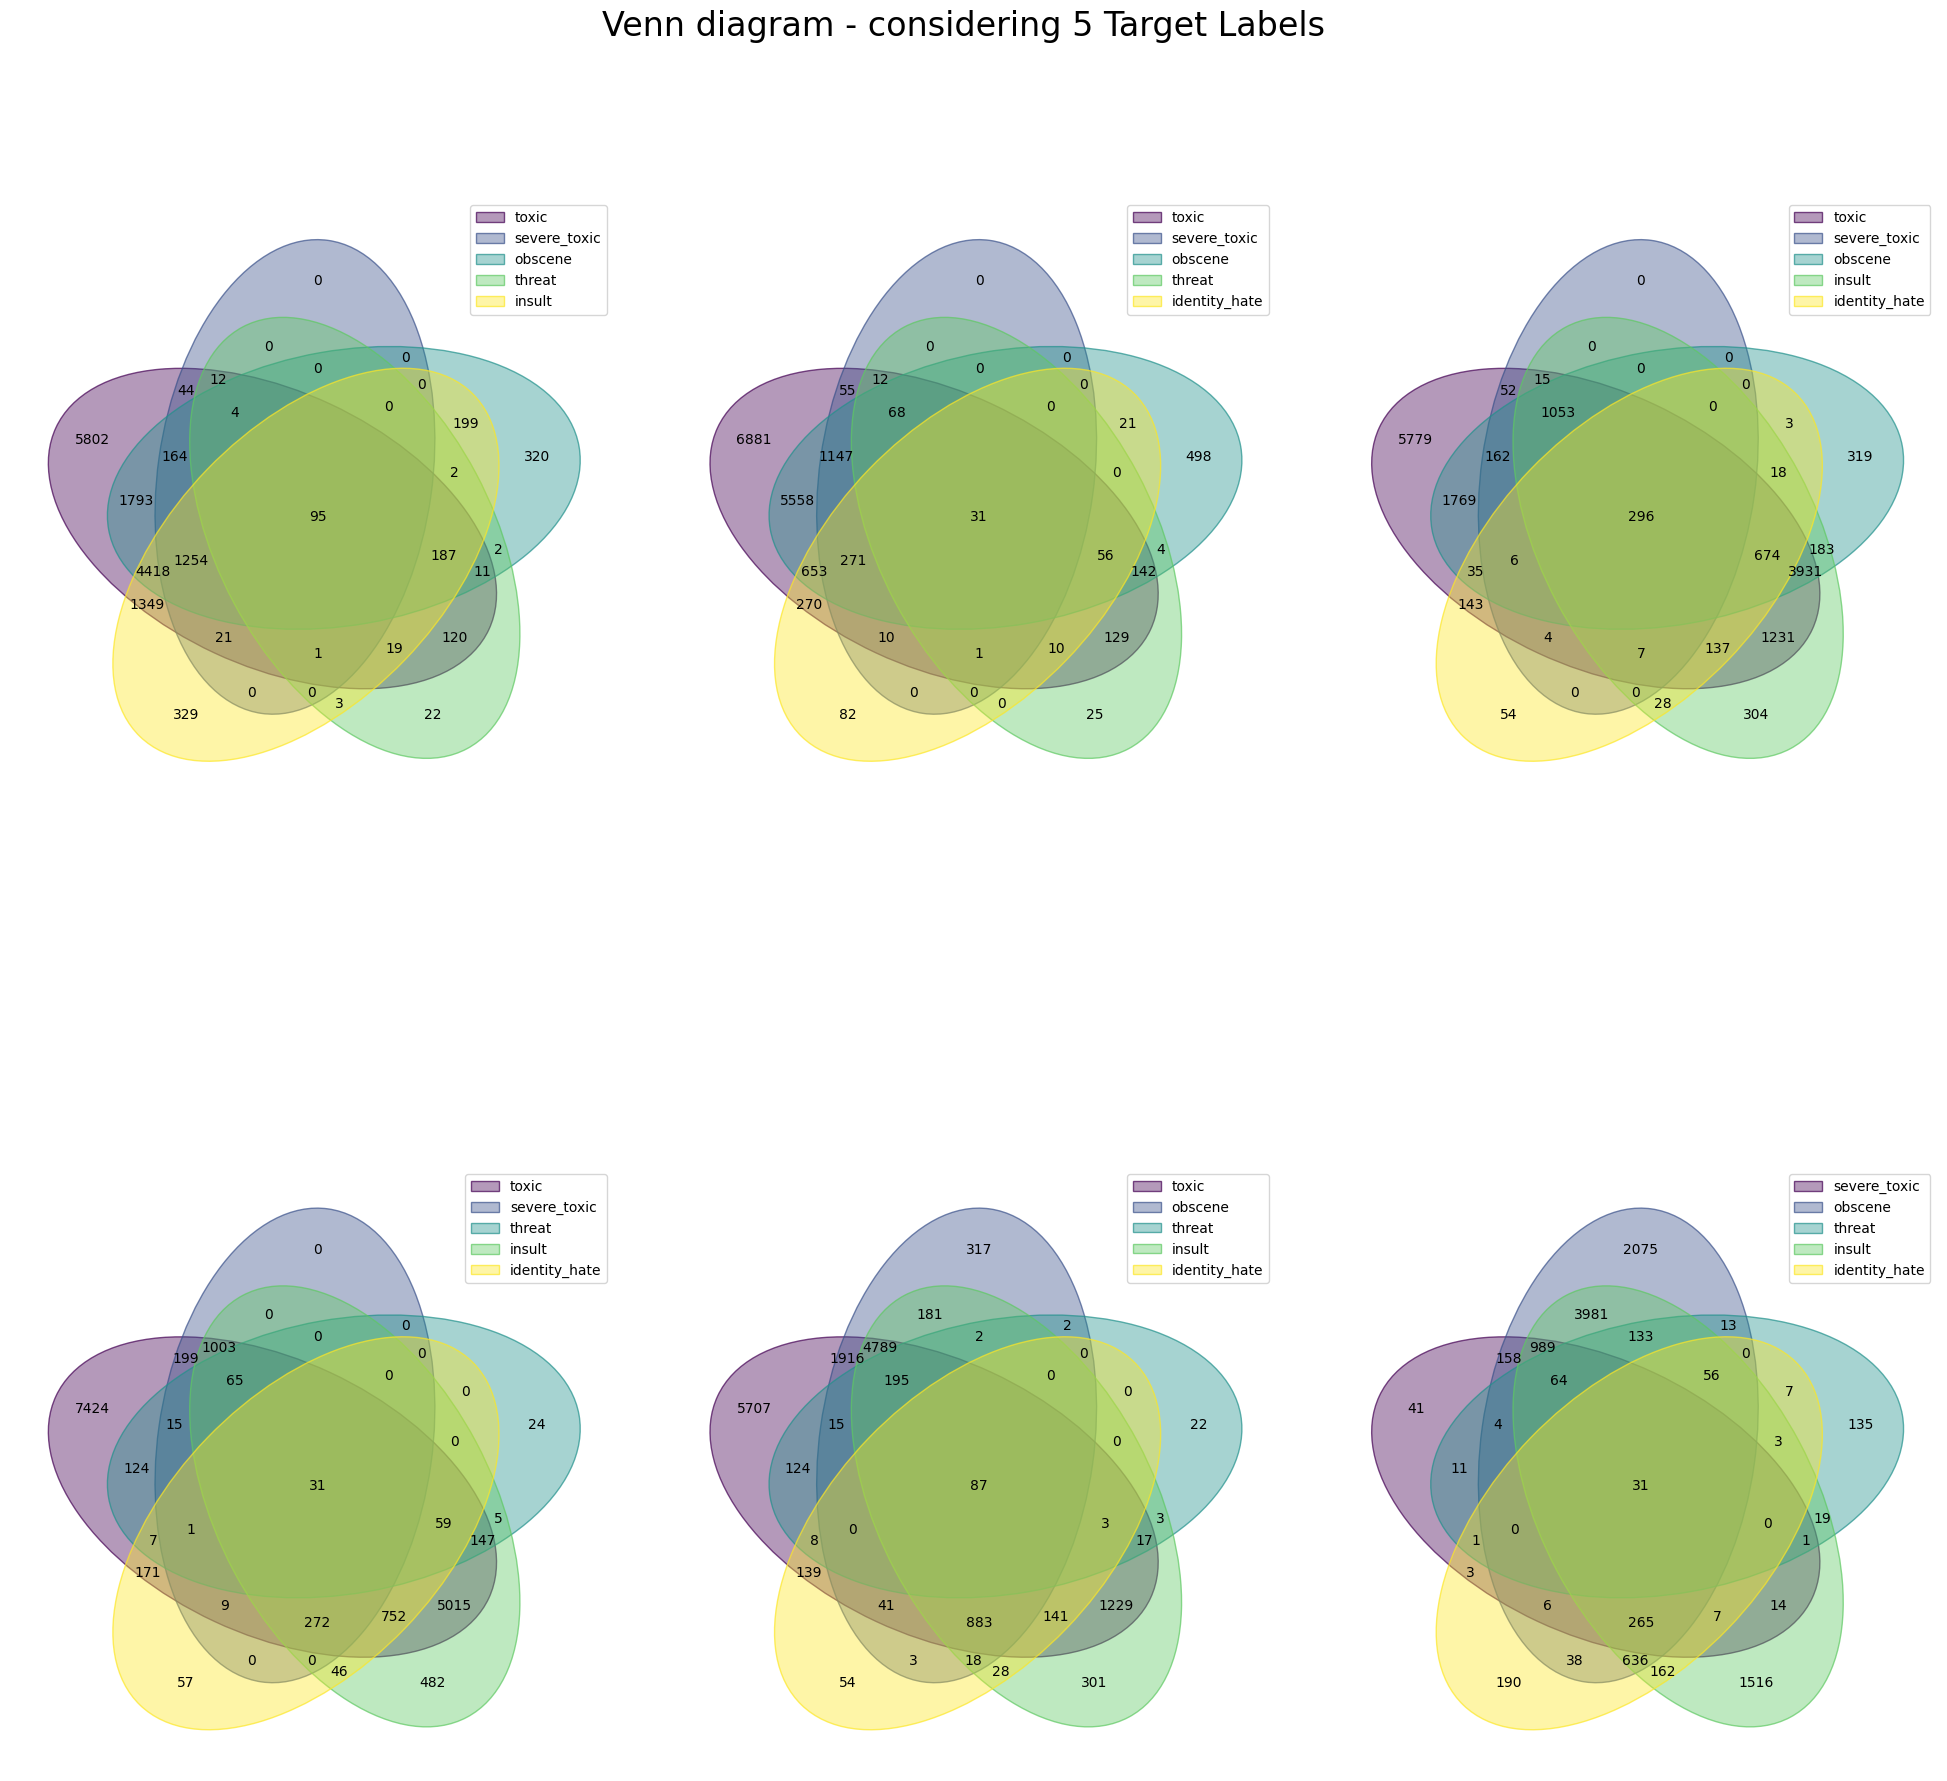

In [13]:
import venn
from itertools import combinations
no_of_labels= np.arange(2,6)
rows_col=[(5,3),(5,4),(5,3),(2,3)] #The variable rows_col is a list of tuples specifying the number of rows and columns for each subplot.

for i,rc in zip(no_of_labels,rows_col):
    comb = combinations(dftrain.columns.values[2:], i)
    fig, top_axs = plt.subplots(ncols=rc[1], nrows=rc[0],figsize=(20, 20))
    fig.suptitle("Venn diagram - considering "+str(i)+" Target Labels",fontsize=24)
    fig.subplots_adjust(top=0.88)
    fig.tight_layout()
    top_axs=top_axs.flatten()
    for j,ax in zip(list(comb),top_axs):
        data_set=dict()
        for k in j:
            data_set[k]=set(dftrain[(dftrain[k]==1)].index)
        venn_dgrm=venn.venn(data_set,legend_loc="best",alpha=0.4,fontsize=10,ax=ax)

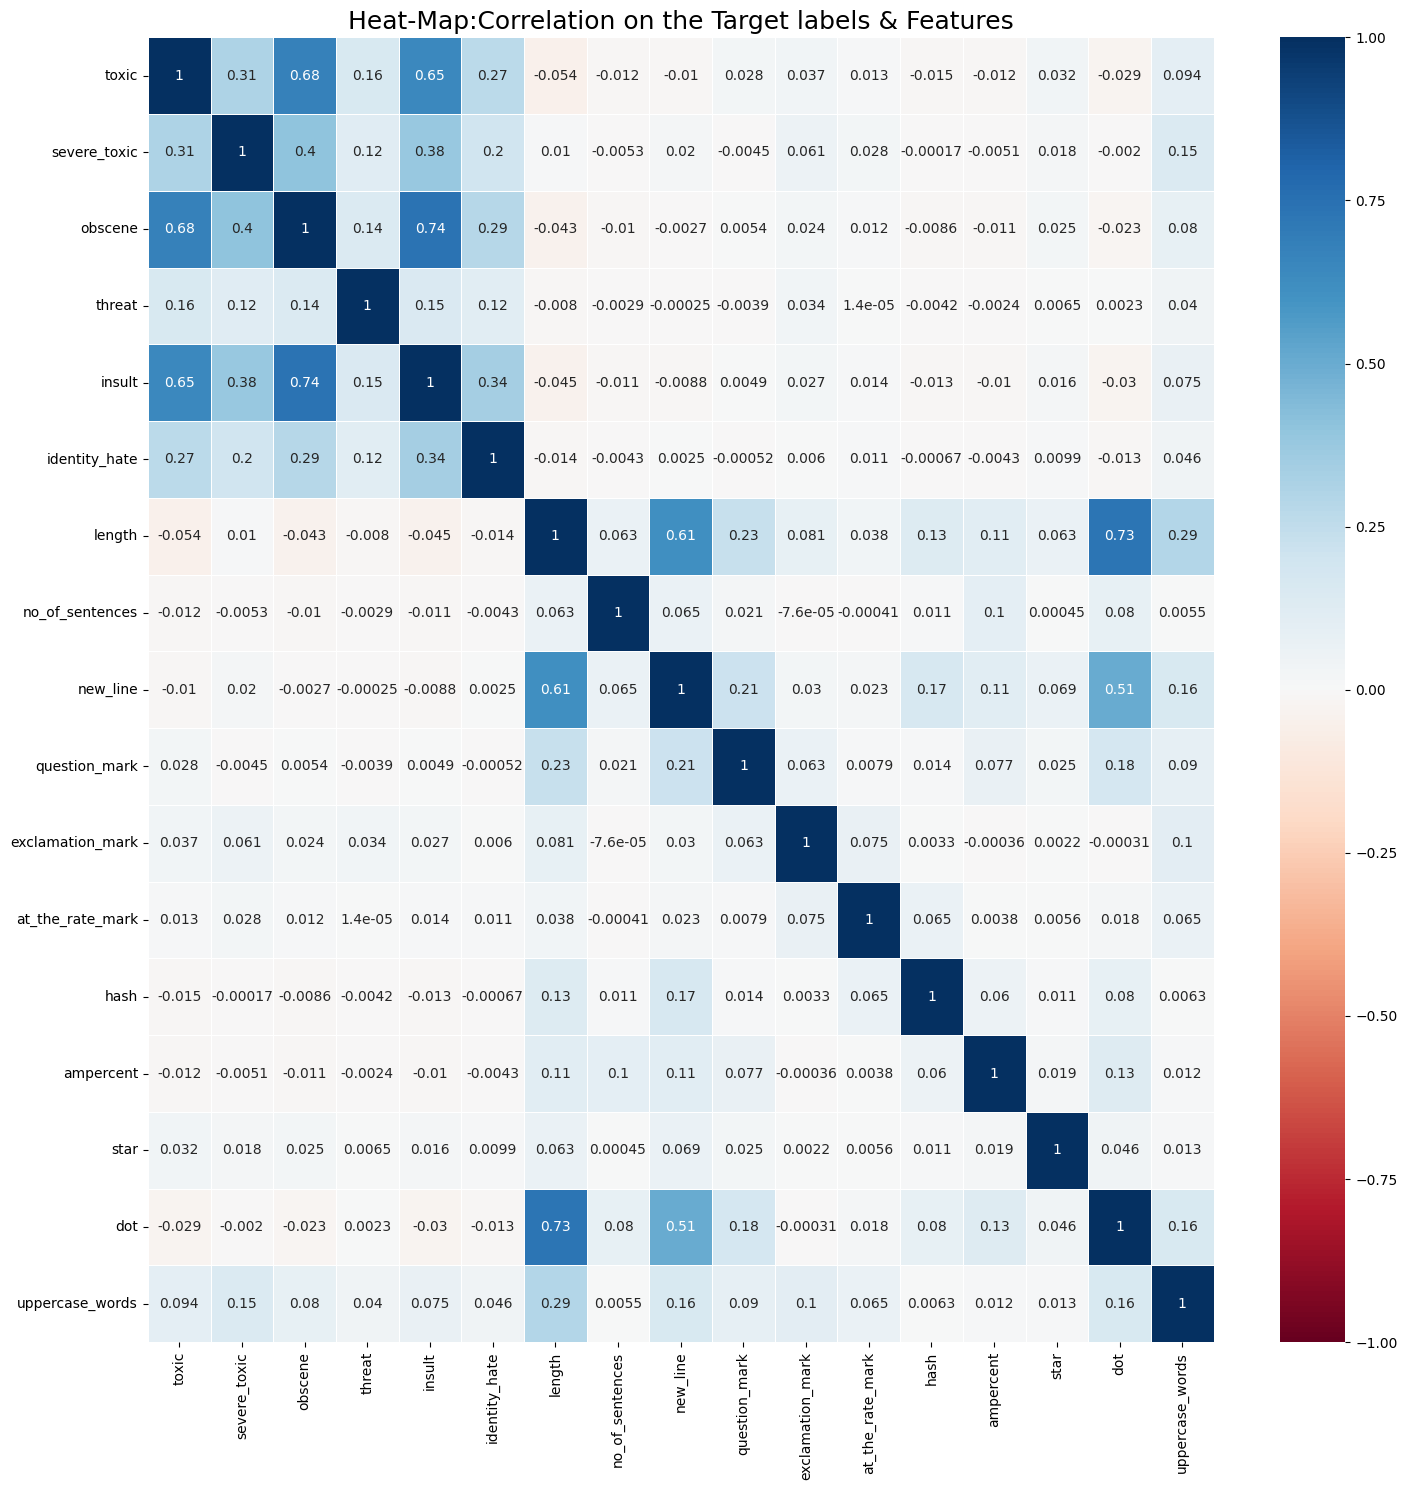

In [14]:
import seaborn as sns
corr_df=dftrain.drop(columns=["id","comment_text"])
corr_df['length']=dftrain['comment_text'].str.len()
corr_df['no_of_sentences']=dftrain['comment_text'].str.split("/n").apply(len)
corr_df['new_line'] = dftrain['comment_text'].str.count('\n')
corr_df['question_mark'] = dftrain['comment_text'].str.count('\?')
corr_df['exclamation_mark'] = dftrain['comment_text'].str.count('!')
corr_df['at_the_rate_mark'] = dftrain['comment_text'].str.count('@')
corr_df['hash'] = dftrain['comment_text'].str.count('#')
corr_df['ampercent'] = dftrain['comment_text'].str.count('&')
corr_df['star']= dftrain['comment_text'].str.count('\*')
corr_df['dot'] = dftrain['comment_text'].str.count('\.')
corr_df['uppercase_words'] = dftrain['comment_text'].str.split().apply(lambda x: sum(map(str.isupper, x)))

correlation=corr_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation,vmin=-1,cmap='RdBu',annot=True,linewidths=.5)
plt.title("Heat-Map:Correlation on the Target labels & Features",fontsize=18)
plt.tight_layout()

In [15]:
from wordcloud import WordCloud, STOPWORDS

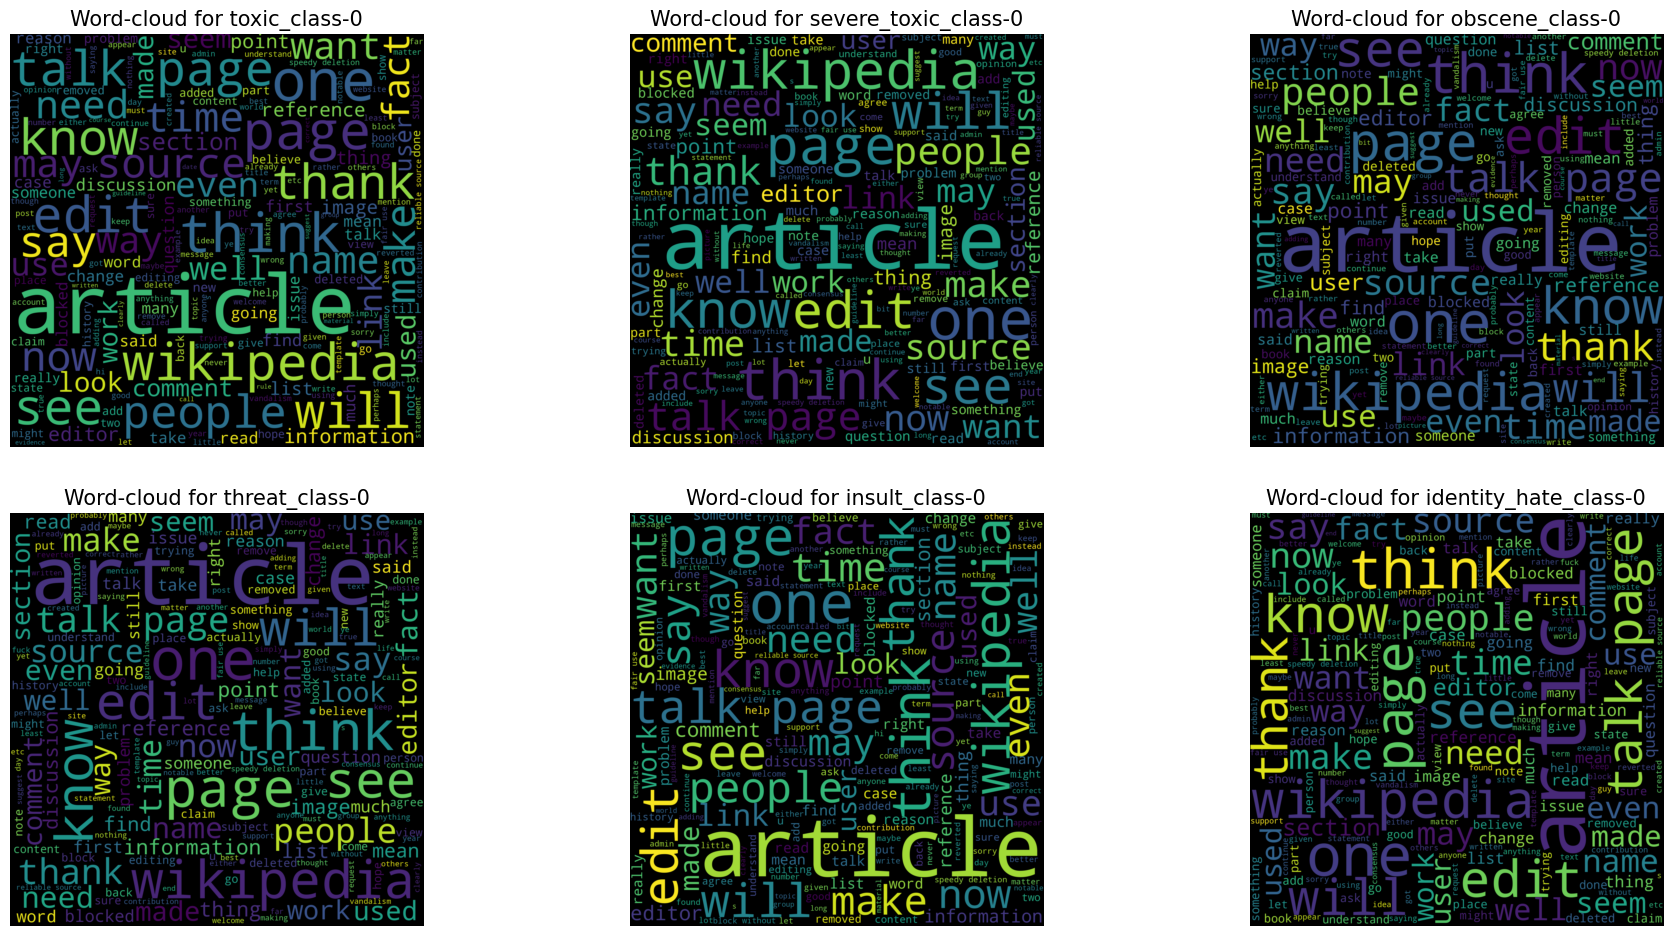

In [16]:
#doc: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
plt.figure(figsize=(20,10))
count=1
for col in dftrain.columns[2:]:
    toxic_class_0 = dftrain[dftrain[col]==0]['comment_text'].str.lower().values
    wordcloud = WordCloud(width=2000, height=2000,
                          background_color ='black', margin=1,
                          stopwords = STOPWORDS,
                          ).generate(" ".join(toxic_class_0))

    plt.subplot(2,3,count)
    plt.axis("off")
    plt.title("Word-cloud for "+col+"_class-0",fontsize=15)
    plt.tight_layout(pad=3)
    plt.imshow(wordcloud,interpolation='bilinear')
    count=count+1
plt.show()

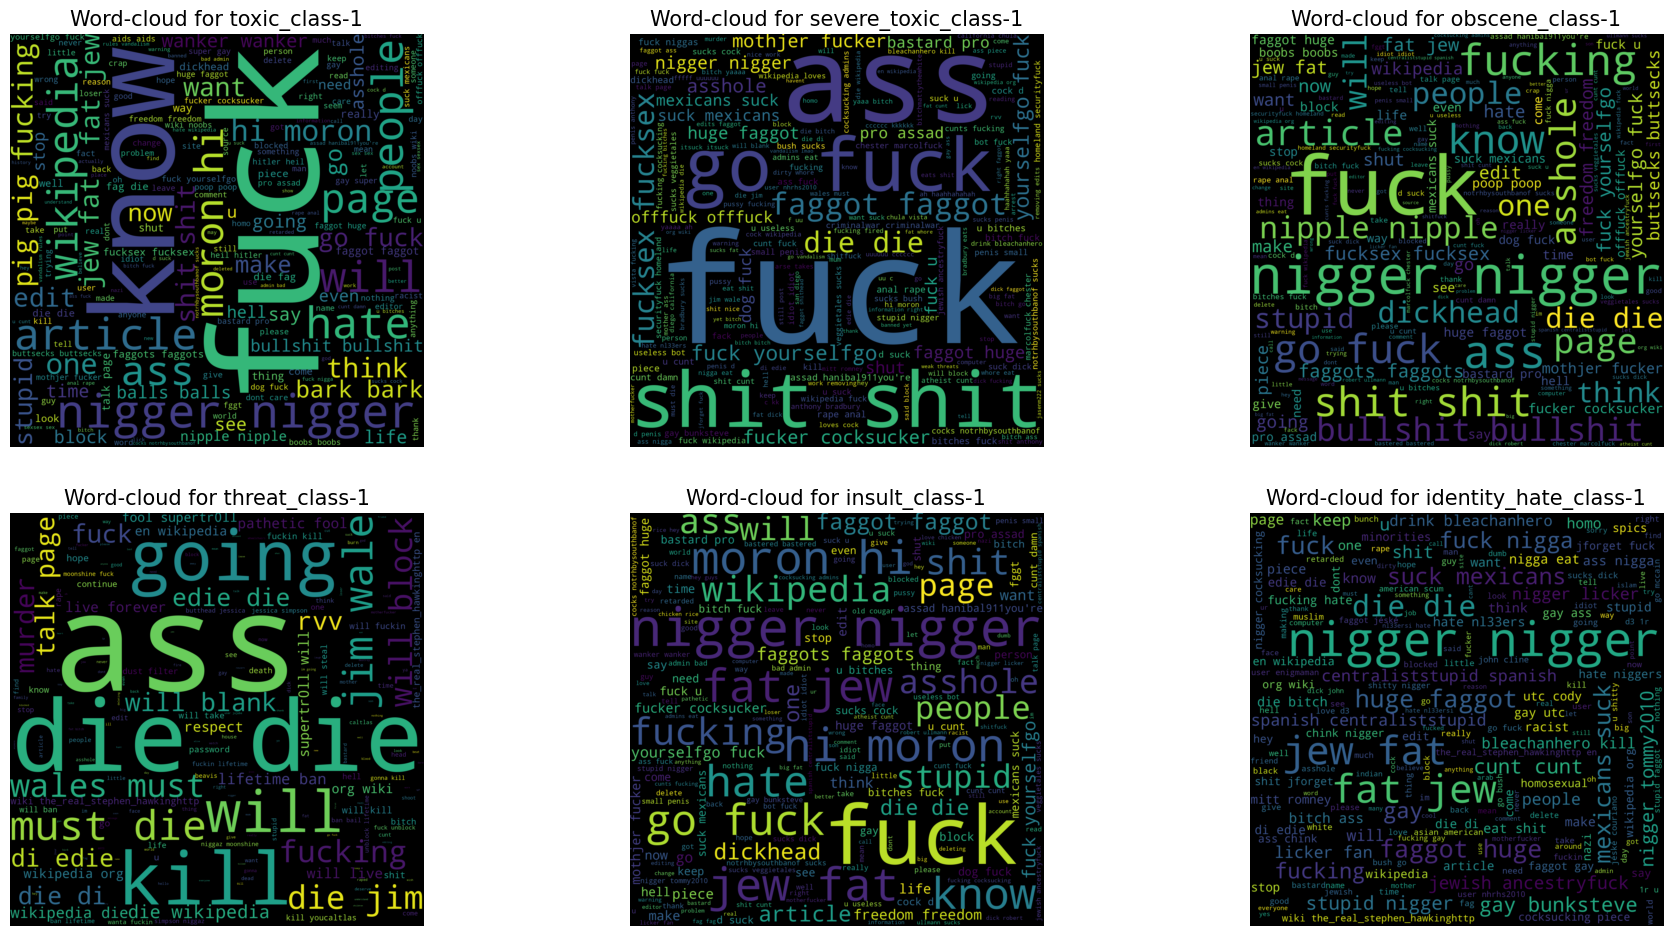

In [17]:
#doc: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
plt.figure(figsize=(20,10))
count=1
for col in dftrain.columns[2:]:
    toxic_class_0 = dftrain[dftrain[col]==1]['comment_text'].str.lower().values
    wordcloud = WordCloud(width=2000, height=2000,
                          background_color ='black', margin=1,
                          stopwords = STOPWORDS,
                          ).generate(" ".join(toxic_class_0))

    plt.subplot(2,3,count)
    plt.axis("off")
    plt.title("Word-cloud for "+col+"_class-1",fontsize=15)
    plt.tight_layout(pad=3)
    plt.imshow(wordcloud,interpolation='bilinear')
    count=count+1
plt.show()

In [18]:
#now preprocessing the text
#text contains hyperlinks,emoji,ip address,html&css and extra punctuations and special characters

dftrain['comment_text'].sample(10)

52883    Hi Awadewit! As a new Wikipedian, it is reassu...
12367    have rich edit histories containing thousands ...
98172    ":I just took a look at my user page on March ...
14816                    Thank you for your encouragement.
5232     greatstory==                                  ...
5972     "\n\nI concur ""tyrann"" ""terrible"" and ""ma...
59705    Note: It would not appear to be appropriate to...
37970                       ll fix eventually if you don't
95625    "\nSeveral things it says that it is the inter...
1296     Fuck you both, I'm not interested in what eith...
Name: comment_text, dtype: object

In [19]:
dftrain.drop(['id'],axis=1,inplace=True)
dftrain

comment_text  toxic  \
0       Explanation\nWhy the edits made under my usern...      0   
1       D'aww! He matches this background colour I'm s...      0   
2       Hey man, I'm really not trying to edit war. It...      0   
3       "\nMore\nI can't make any real suggestions on ...      0   
4       You, sir, are my hero. Any chance you remember...      0   
...                                                   ...    ...   
159566  ":::::And for the second time of asking, when ...      0   
159567  You should be ashamed of yourself \n\nThat is ...      0   
159568  Spitzer \n\nUmm, theres no actual article for ...      0   
159569  And it looks like it was actually you who put ...      0   
159570  "\nAnd ... I really don't think you understand...      0   

        severe_toxic  obscene  threat  insult  identity_hate  
0                  0        0       0       0              0  
1                  0        0       0       0              0  
2                  0        0       0       0              0  
3                  0        0       0       0              0  
4                  0        0       0       0              0  
...              ...      ...     ...     ...            ...  
159566             0        0       0       0              0  
159567             0        0       0       0              0  
159568             0        0       0       0              0  
159569             0        0       0       0              0  
159570             0        0       0       0              0  

[159571 rows x 7 columns]